# Data Dataset

In this notebook, I will be using the **data_o.csv** dataset. This one was the most interesting one to analyse.

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data_o.csv")

I can conclude that i do not need the features: id, release_date

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [8]:
nRows, nCols = df.shape
print(f'This dataset has {nRows} rows and {nCols} columns.')

This dataset has 170653 rows and 19 columns.


In [4]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

Unique values per column

In [6]:
df.nunique()

valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
dtype: int64

There are no duplicates

In [7]:
df.duplicated().any()

False

There are no null values

In [10]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

Percentage of the uniqueness per column

In [11]:
df.nunique() / df.shape[0]*100

valence               1.015511
year                  0.058598
acousticness          2.747681
artists              19.975037
danceability          0.726621
duration_ms          30.327624
energy                1.366516
explicit              0.001172
id                  100.000000
instrumentalness      3.164902
key                   0.007032
liveness              1.019613
loudness             14.889864
mode                  0.001172
name                 78.309787
popularity            0.058598
release_date          6.588809
speechiness           0.952811
tempo                49.629365
dtype: float64

Year is closely correlated with popularity.

The energy is correlated with the loudness.

Energy is inversely correlated with acousticness.

<AxesSubplot:>

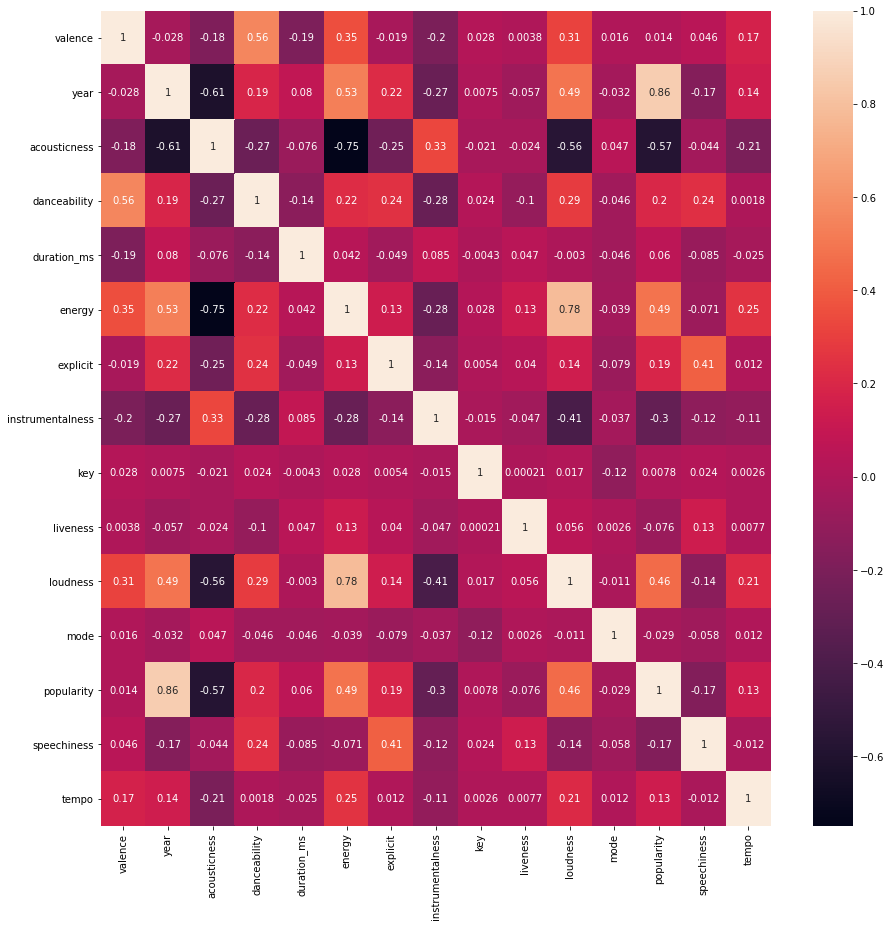

In [12]:
plt.figure(figsize = (15,15)) 
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Popularity Based on acousticness')

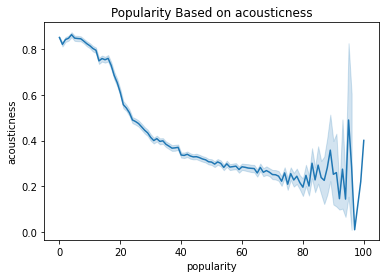

In [13]:
sns.lineplot(y = 'acousticness', x = 'popularity', data = df)
plt.title('Popularity Based on acousticness')

Text(0.5, 1.0, 'Popularity Based on danceability')

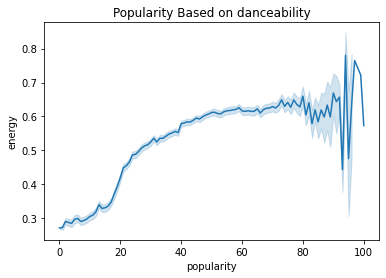

In [14]:
sns.lineplot(y = 'energy', x = 'popularity', data = df)
plt.title('Popularity Based on danceability')

Text(0.5, 1.0, 'Popularity Based on loudness')

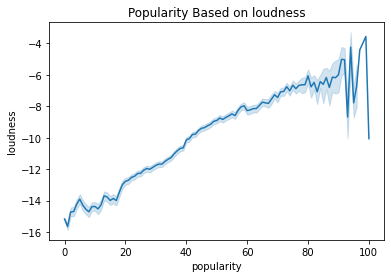

In [15]:
sns.lineplot(y = 'loudness', x = 'popularity', data = df)
plt.title('Popularity Based on loudness')

Text(0.5, 1.0, 'Popularity Based on duration_ms')

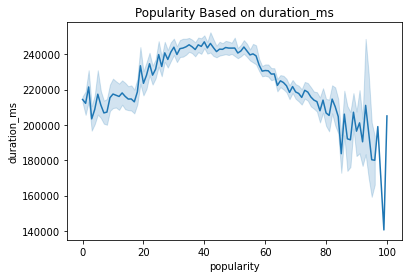

In [16]:
sns.lineplot(y = 'duration_ms', x = 'popularity', data = df)
plt.title('Popularity Based on duration_ms')

The pairplot bellow shows whether a song is explicit or not according on the other features.

For example, let's look at danceability and loudness.
With large values for danceability and large values for loudness, we can assume that the song is explicit.

Pairplot segregated on Explicit


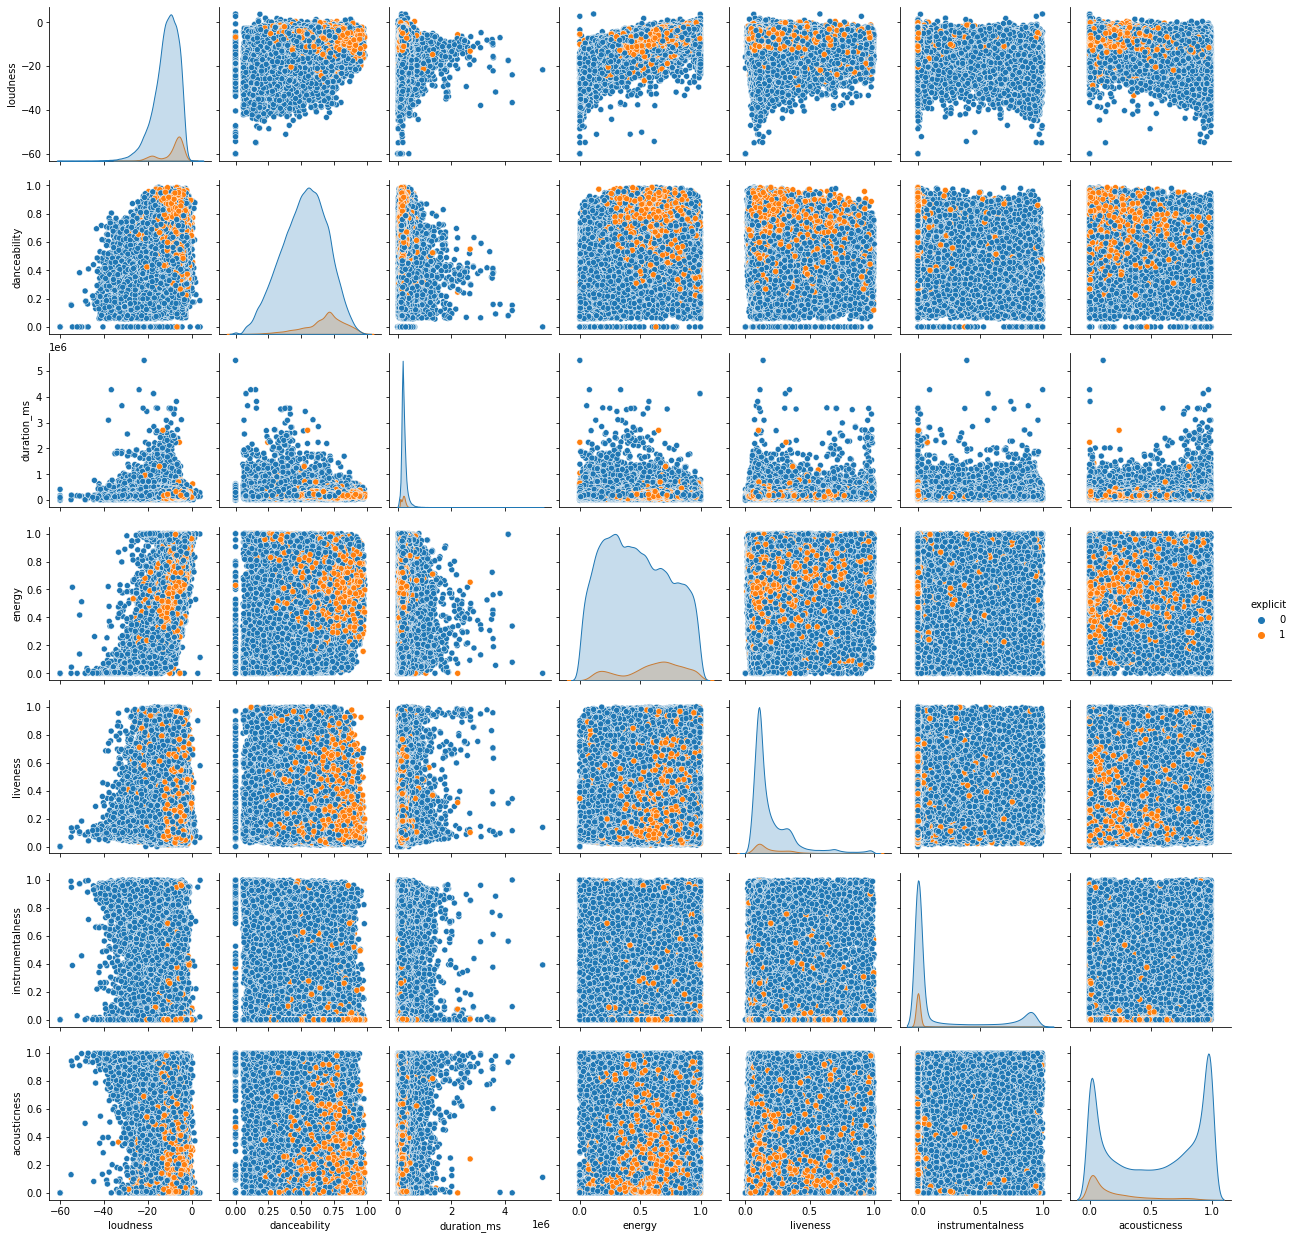

In [17]:
sns.pairplot(data=df[['loudness','danceability','duration_ms','energy','liveness','instrumentalness','acousticness','explicit']], hue='explicit')
print('Pairplot segregated on Explicit')
plt.show()

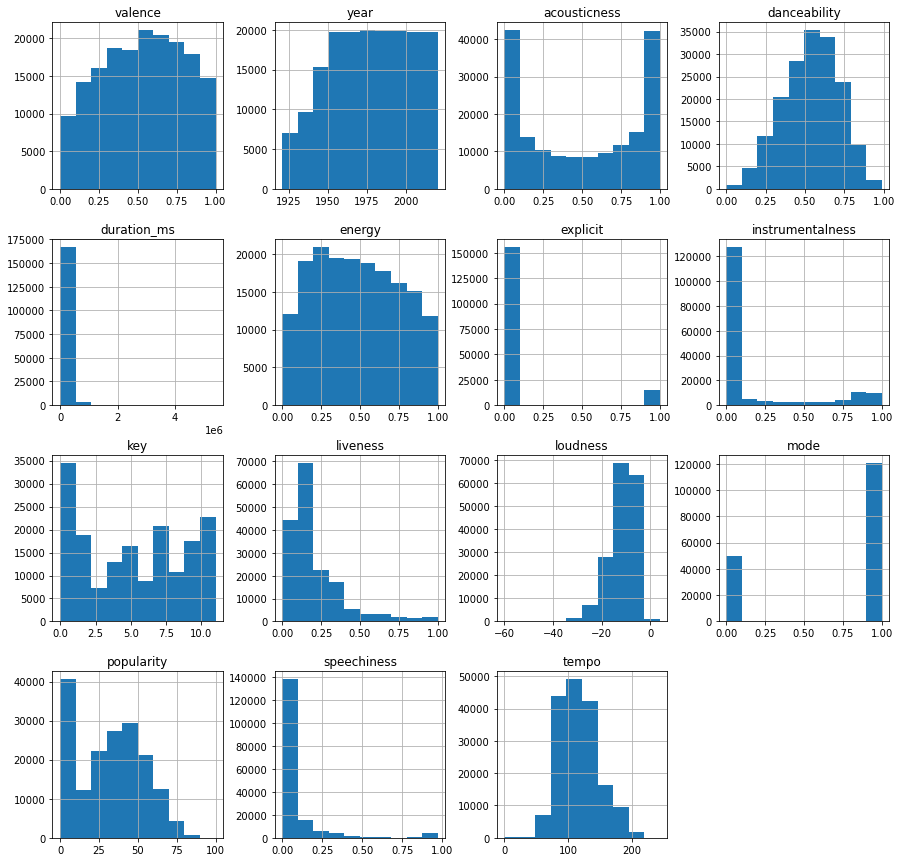

In [18]:
df.hist(figsize=(15,15))
plt.show()

# Outliers

The median of the popularity of explicit songs is ~50.

50% of the explicit songs have popularity in the range between 40 to 60.

Therefore, if a song is explicit and if it is very popular, it is an outlier.

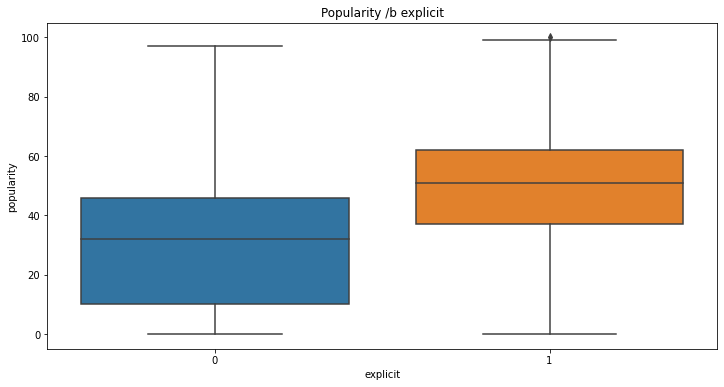

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.title('Popularity /b explicit')

plt.show()

If the data is explicit and is before year 1960, then probably it is outlier.

After exploring, we might later delete there outliers.

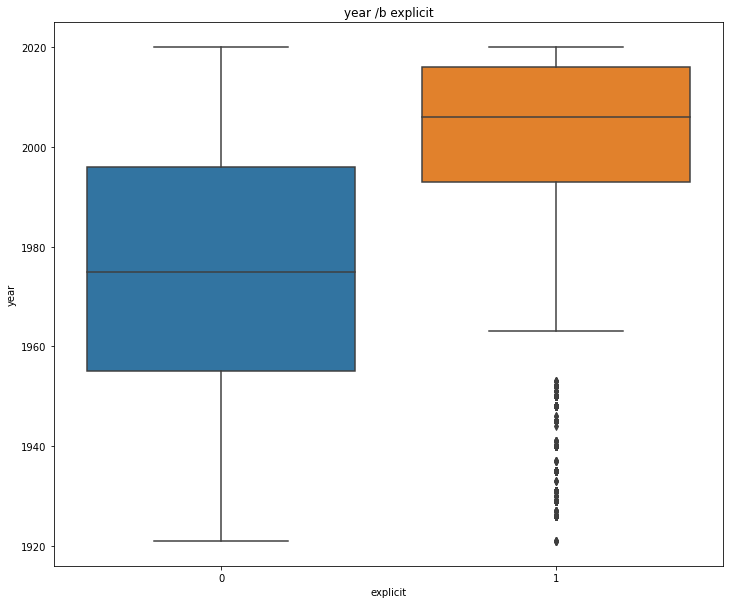

In [20]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='explicit', y='year')
plt.title('year /b explicit')

plt.show()

If the song is explicit and very acoustic, it might be an outlier.

We can't drop these outliers since they might be an important group.

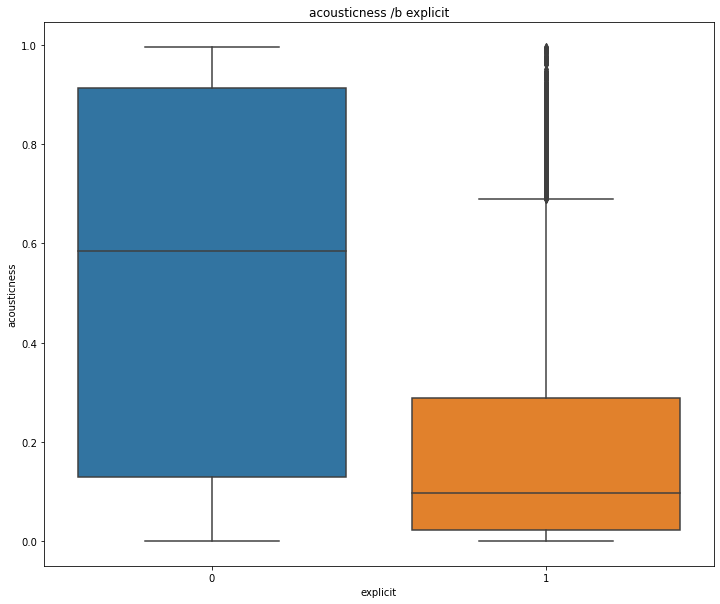

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='explicit', y='acousticness')
plt.title('acousticness /b explicit')

plt.show()

# Preprocessing

Take all the rows where the year is < 1960.

In [23]:
df_filtered = df[df['year'] < 1960]
df_filtered.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


I will drop all the rows where explicit==1 and the year is lower than 1960. 
I am doing this because with a litle bit of researching on the Internet, I found out that all the data that meets these condiions is not valid. 
In most cases, the year is not valid.

In [25]:
df[(df.year < 1960) & (df.explicit == 1)].head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
14,0.4930,1921,0.0175,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.3840,7,0.3580,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935
18,0.0778,1921,0.1480,['THE GUY'],0.604,204957,0.418,1,0QQmUf4aPFaN9U2yRko595,0.0382,4,0.1020,-11.566,0,When We Die,0,1921-09-11,0.0417,80.073
40,0.5440,1921,0.1850,['THE GUY'],0.577,404062,0.422,1,1T2NGVgAoXjQPEjxTGFRZV,0.0349,1,0.1780,-11.108,1,Love for Guns,0,1921-09-11,0.0575,79.997
88,0.0779,1921,0.5880,['THE GUY'],0.341,323840,0.256,1,3YVy92W44JmU6KeF6UMldm,0.1570,9,0.1050,-16.012,1,Tigers,0,1921-09-11,0.0461,121.051
99,0.4060,1921,0.4470,['THE GUY'],0.708,279171,0.544,1,4SU8RBlxrOtlHjkUxkpDCY,0.0375,0,0.0733,-8.124,1,Don't Run,0,1921-09-11,0.0316,120.000


In [26]:
df = df.drop(df[(df.year < 1960) & (df.explicit == 1)].index)

Also, I will drop the column release_date because there already is a year column that shows me the year in which the track was released.

In [27]:
df = df.drop(['release_date'], axis = 1) 

In [32]:
df = df.drop(['artists'], axis = 1) 

In [34]:
df = df.drop(['id'], axis = 1) 

In [36]:
df = df.drop(['name'], axis = 1) 

In [51]:
df.to_csv("data_preproccessed.csv")

## 2D PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(df)

In [38]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,599056.077428,75.953955
1,-52077.922354,81.155712
2,267451.077273,55.788135
3,-22610.922640,59.941030
4,-65917.922651,59.311329


<Figure size 432x288 with 0 Axes>

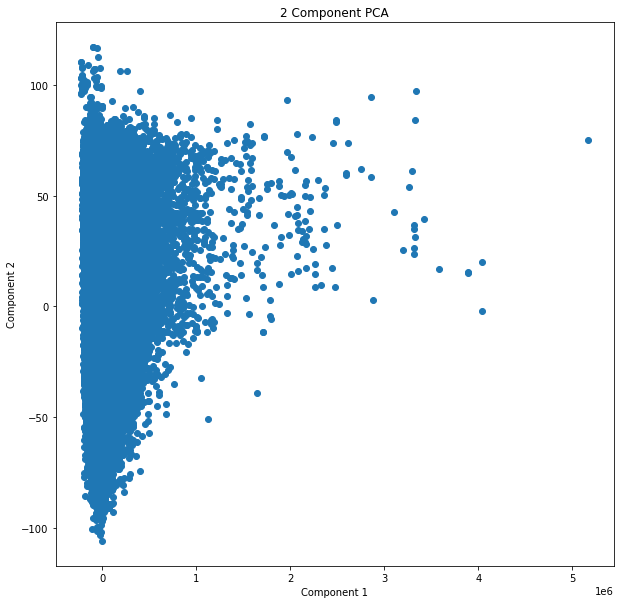

In [39]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

## 3D PCA 

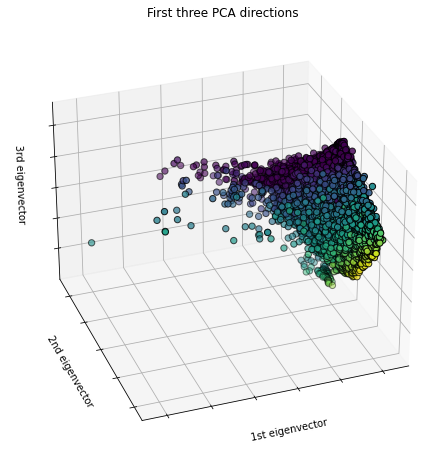

In [42]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

colors = ['navy', 'turquoise', 'darkorange']

y = df['popularity']

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(df).transform(df) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## K-means clustering

In [43]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalComponents1)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

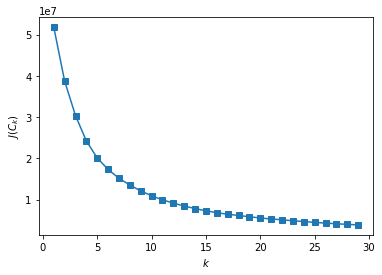

In [44]:
plt.plot(range(1, 30), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

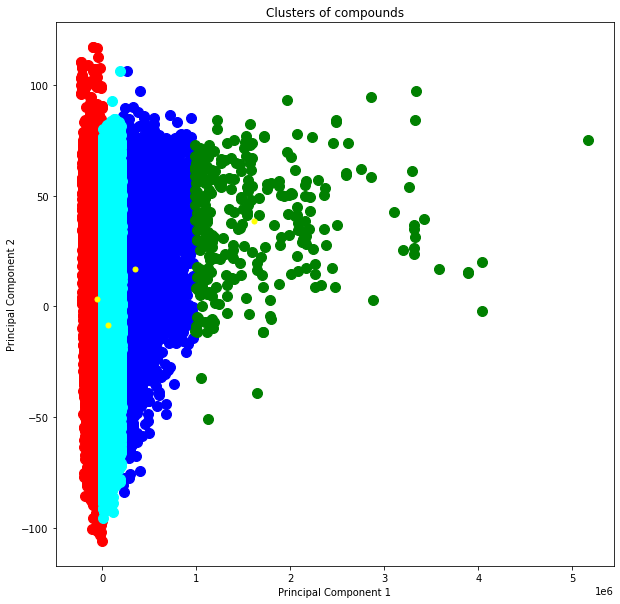

In [50]:
from matplotlib import colors as mcolors

plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()